In [ ]:
!nvidia-smi

Wed Jun 19 19:37:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("animals-ggvme").project("animals-detection-u94oj")
version = project.version(6)
dataset = version.download("yolov8")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to animals-detection-6 in yolov8:: 100%|██████████| 3650/3650 [00:00<00:00, 3766.67it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 batch=16 plots=True


/content
New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/animals-detection-6/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visua

In [ ]:
model_path = '/content/runs/detect/train2/weights/best.pt'
from google.colab import files
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1718829298.c66cabedc3f1.17984.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					     train_batch3200.jpg  weights
P_curve.png					     train_batch3201.jpg
PR_curve.png					     train_batch3202.jpg


/content


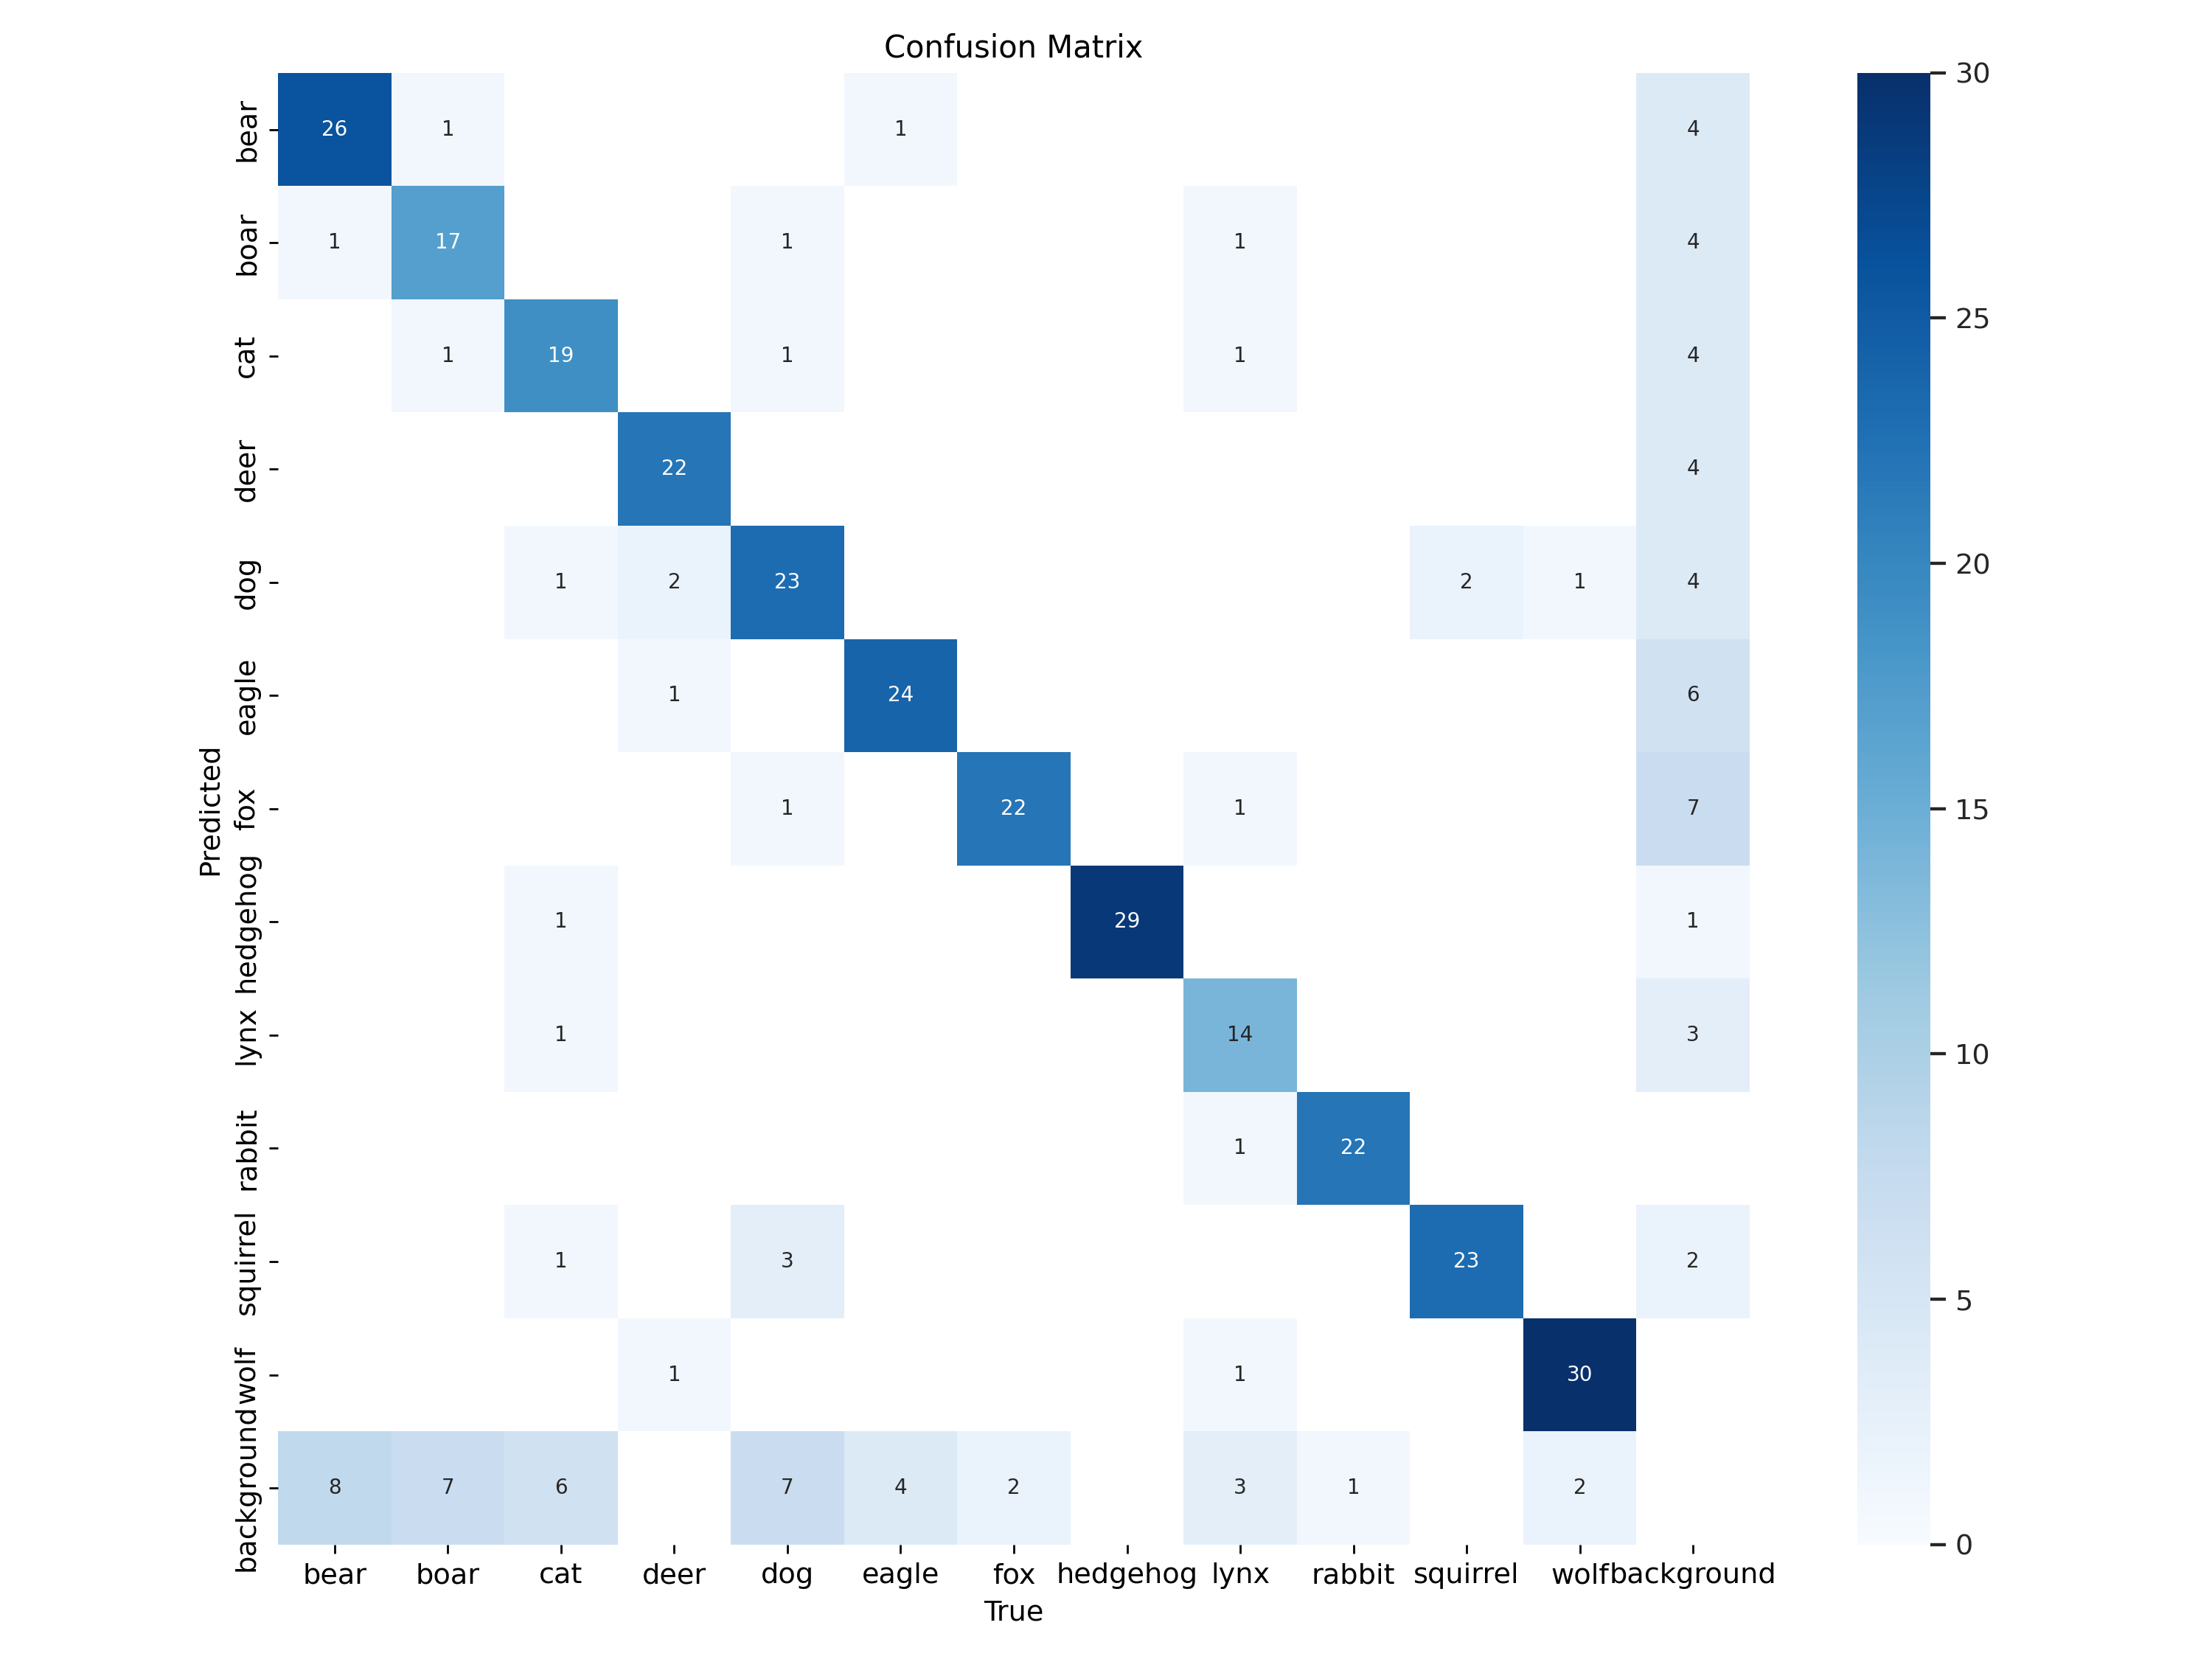

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


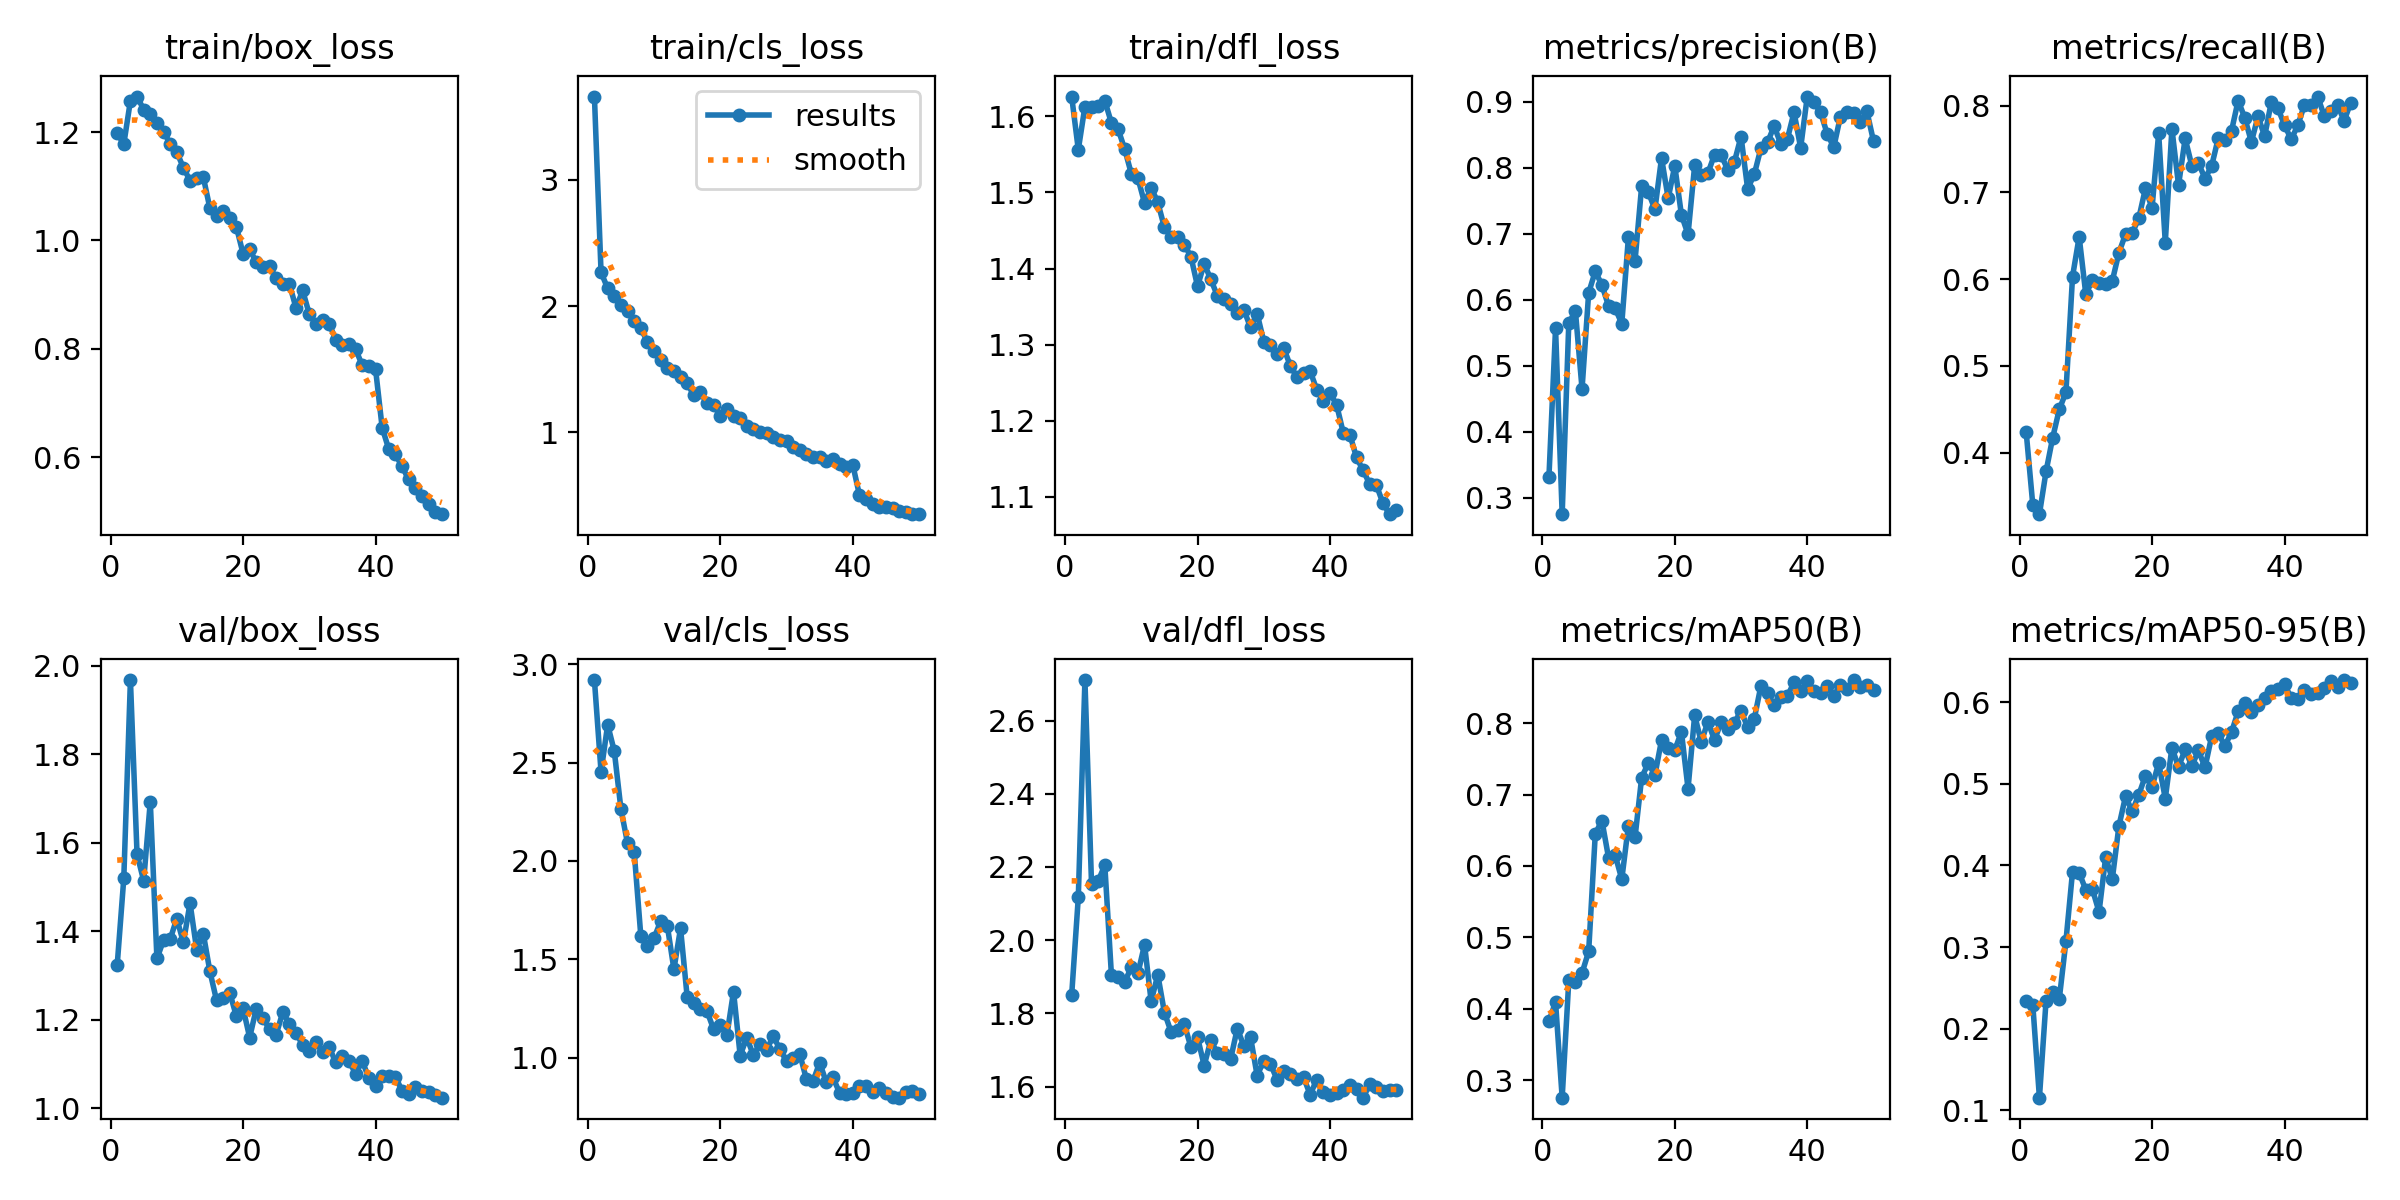

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


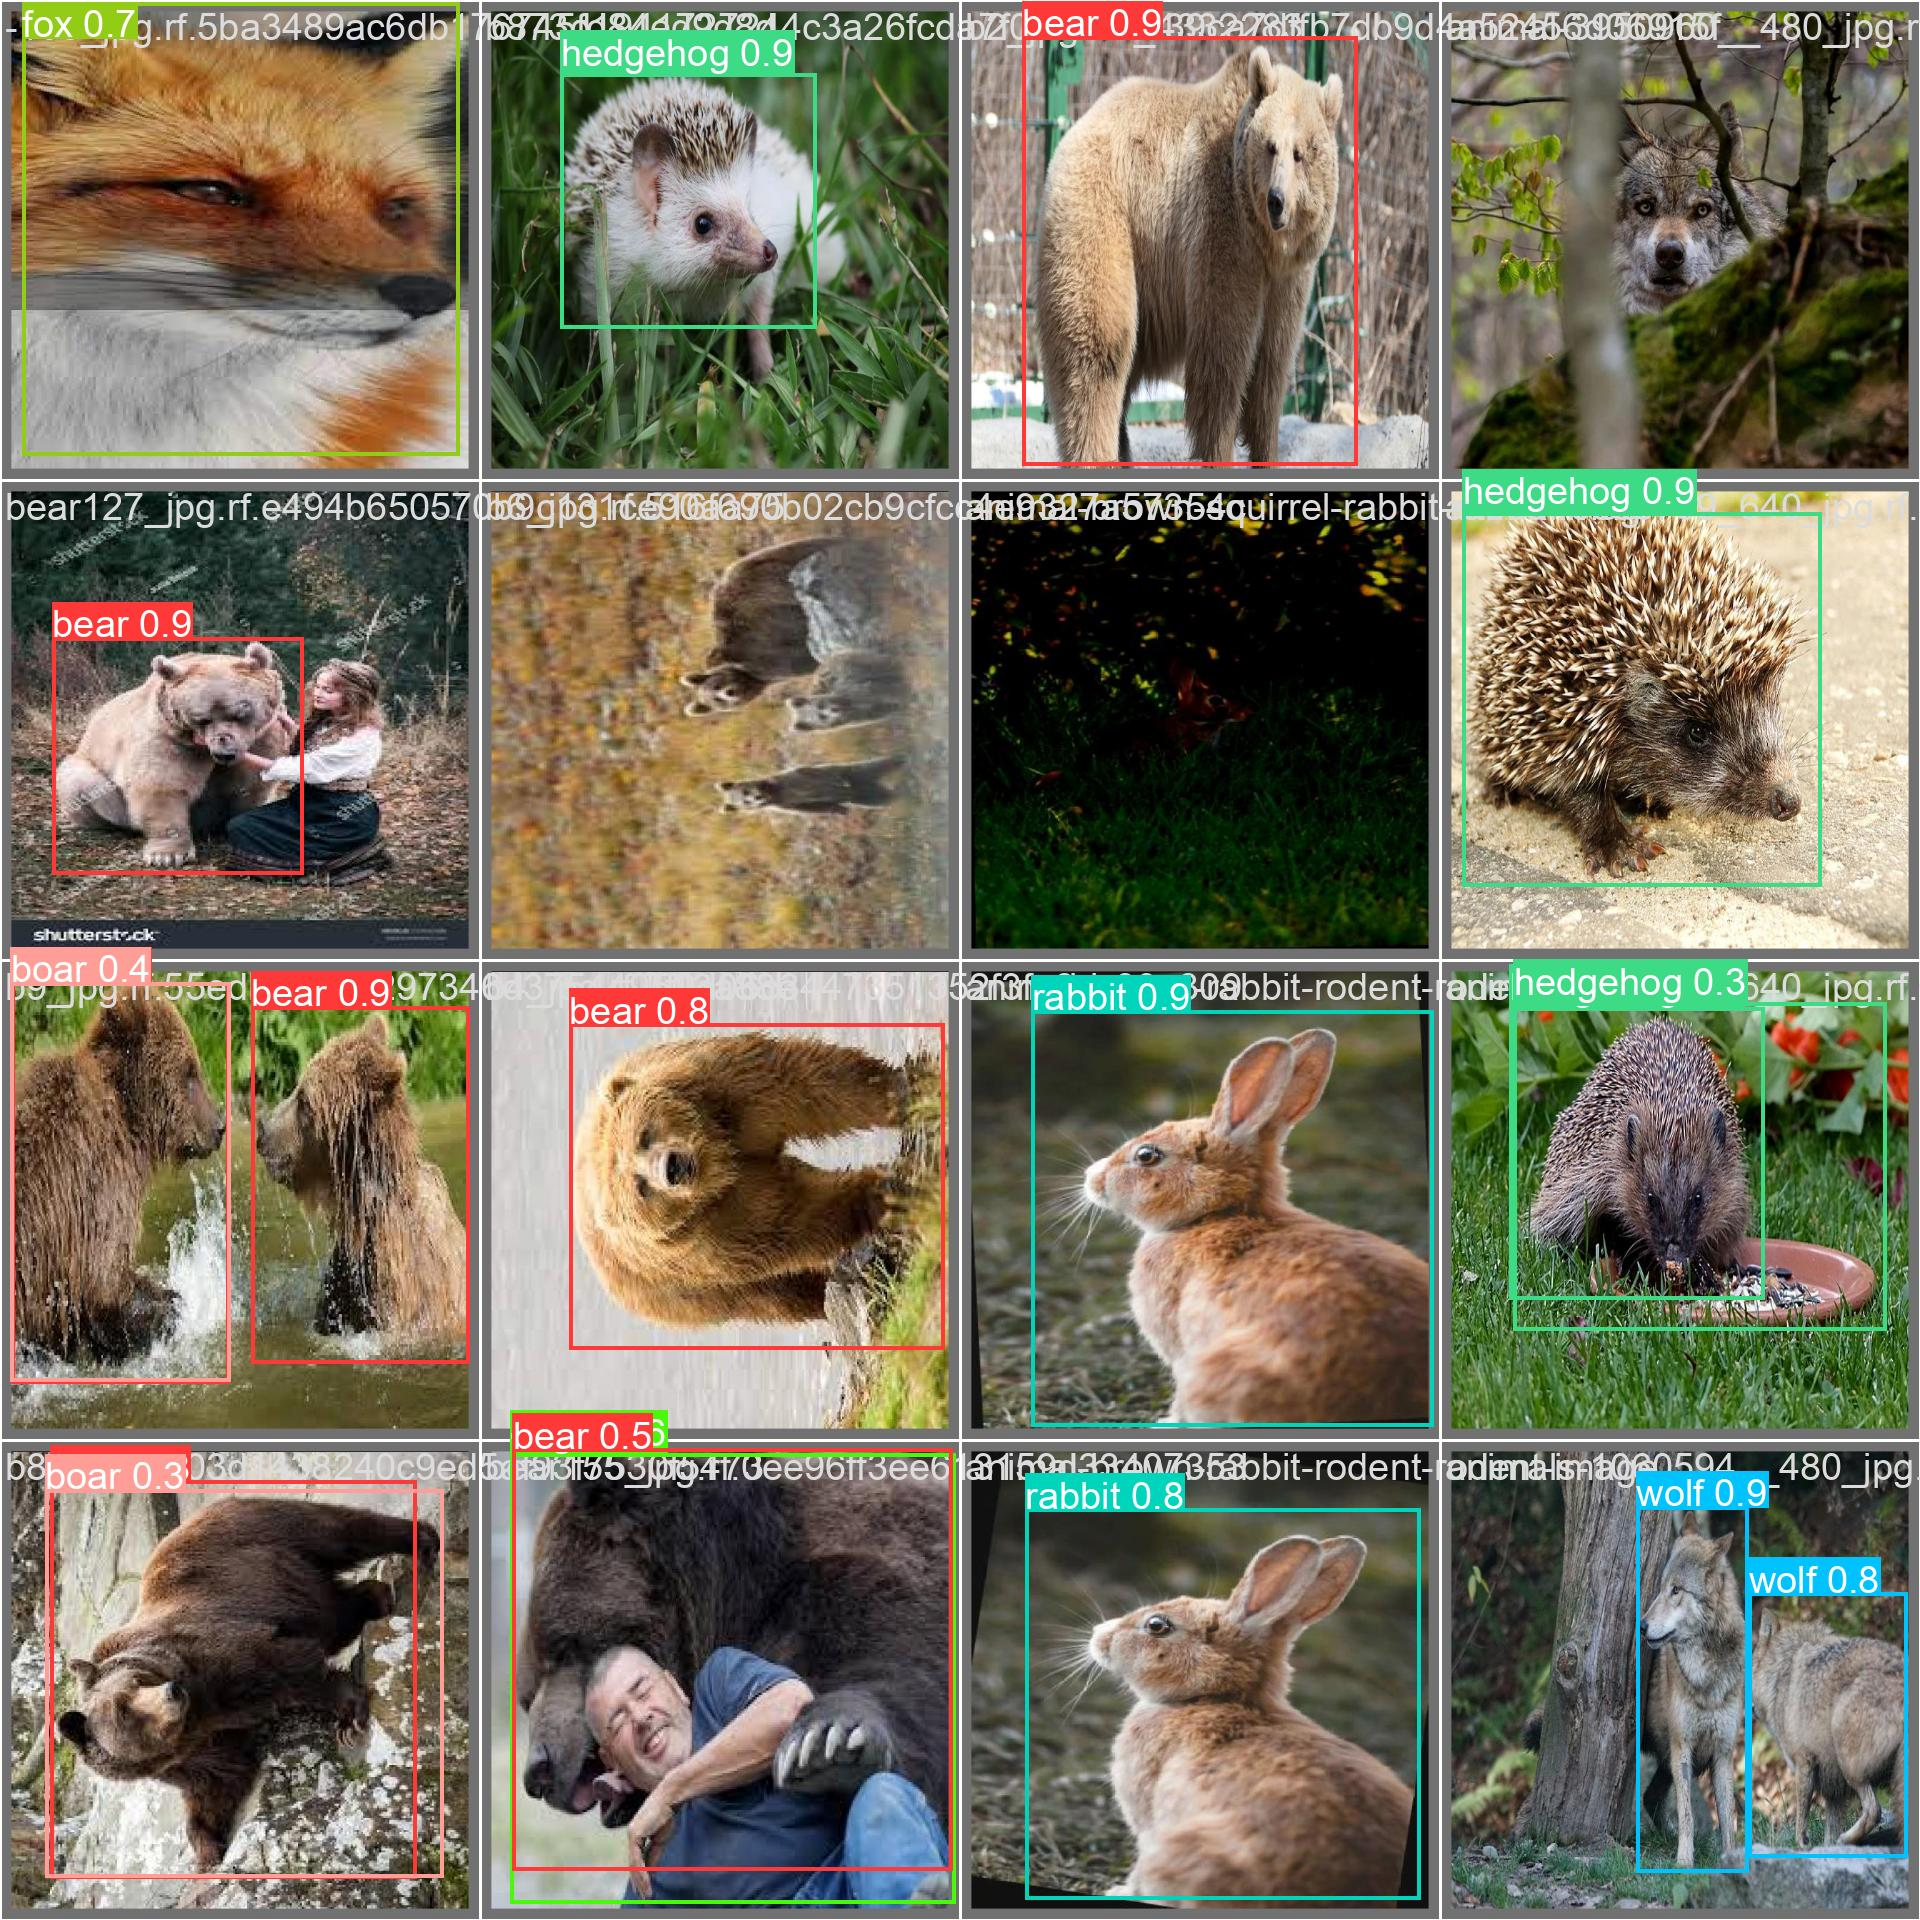

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/animals-detection-6/valid/labels.cache... 287 images, 0 backgrounds, 0 corrupt: 100% 287/287 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 10, len(boxes) = 337. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 18/18 [00:06<00:00,  2.75it/s]
                   all        287        337      0.885      0.783      0.854      0.627
                  bear        287         35      0.745      0.657      0.716      0.492
                  boar        287         26      0.783      0.577      0.658      0.408
                

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

image 1/266 /content/datasets/animals-detection-6/test/images/-1-_jpg.rf.e3fd21be4a8702e4c7169fab2e2f0e72.jpg: 640x640 1 dog, 16.5ms
image 2/266 /content/datasets/animals-detection-6/test/images/-113_jpg.rf.633888fd1c510c37a18b3df5f08dce8c.jpg: 640x640 1 fox, 16.5ms
image 3/266 /content/datasets/animals-detection-6/test/images/-132_jpg.rf.bd469ee66e40851447ddf534d23ce8cf.jpg: 640x640 2 foxs, 16.4ms
image 4/266 /content/datasets/animals-detection-6/test/images/-140_jpg.rf.63161f99d85089b117a8ef2bb75eb8d6.jpg: 640x640 1 fox, 16.4ms
image 5/266 /content/datasets/animals-detection-6/test/images/-149_jpg.rf.cf427e35d58b01473bdd5e1318e093cd.jpg: 640x640 1 fox, 16.4ms
image 6/266 /content/datasets/animals-detection-6/test/images/-162_jpg.rf.4fdc1e9067719ddcb69a8dccef4d653a.jpg: 640x640 1 fox, 16.4ms
image 7/266 /cont

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")

View the status of your deployment at: https://app.roboflow.com/animals-ggvme/animals-detection-u94oj/6
Share your model with the world at: https://universe.roboflow.com/animals-ggvme/animals-detection-u94oj/model/6
